In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sns
import nltk
from nltk.corpus import stopwords 
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
pd.set_option('display.max_colwidth', None)
from top2vec import Top2Vec

[nltk_data] Downloading package punkt to /home/yiwen-h/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yiwen-h/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/yiwen-h/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yiwen-h/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2022-07-07 13:59:16.817322: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-07 13:59:16.817408: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv("../csv/2019_crossref_pubmed_upw_openalex.csv", index_col = 0)
# Basic preprocessing

# Replace if no abstract with title of article
df.abstract.fillna(df['article title'], inplace=True)
df.dropna(inplace = True)
df.shape

(24162, 16)

In [3]:
data = pd.DataFrame(df.abstract)

# Added some medical specific terminology to the stopwords list - this could be refined
stop_words = list(set(stopwords.words('english')))
medical_words = ['jan', 'feb', 'mar', 'apr','may','jun','jul','aug','sep','oct','nov','dec', 
                 'erratum', 'letter', 'comment', 'abstract', 'background', 'methods', 'results', 
                 'conclusion', 'medline', 'patient', 'study']
stop_words += medical_words

# Create function to clean text
def clean(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in words_only] # Lemmatize
    without_stopwords = [word for word in lemmatized if word not in stop_words] # Remove Stop Words
    return without_stopwords


In [4]:
# Apply cleaning function
data['clean_text'] = data.abstract.apply(clean)
data['clean_text'] = data['clean_text'].astype('str')

data.head()

abstract  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Neuromyelitis optica spectrum disorder (NMOSD) is an uncommon antibody-mediated disease of the central nervous system. Long segments of spinal cord inflammation (myelitis), severe optic neuritis, and/or bouts of intractable vomiting and hiccoughs (area postrema syndrome) are classic presentations of the disease and may alert the clinician to the diagnosis. Untreated, approximately 50% of NMOSD patients will be wheelchair users and blind, and a third will have died within 5 years of their first attack. Unlike multiple sclerosis, a progressive clinical course is very unusual and the accrual of disability is related to relapses. Approximately 75% of patients have antibodies against aquaporin-4, a water channel expressed on astrocytes. Relapses are treated aggressively to prevent residual disability with high-dose steroids and often plasma exchange. Relapse prevention is crucial and achieved with long-term immunosuppression. In this article we review the pathogenesis, clinical features, diagnosis and management of NMOSD.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [5]:
model = Top2Vec(data['clean_text'].values, embedding_model='doc2vec')

2022-07-07 14:00:39,145 - top2vec - INFO - Pre-processing documents for training
2022-07-07 14:00:46,762 - top2vec - INFO - Creating joint document/word embedding
2022-07-07 14:05:40,931 - top2vec - INFO - Creating lower dimension embedding of documents
2022-07-07 14:06:10,350 - top2vec - INFO - Finding dense areas of documents
2022-07-07 14:06:12,508 - top2vec - INFO - Finding topics


In [6]:
model.get_num_topics()

321

In [7]:
topic_sizes, topic_nums = model.get_topic_sizes()

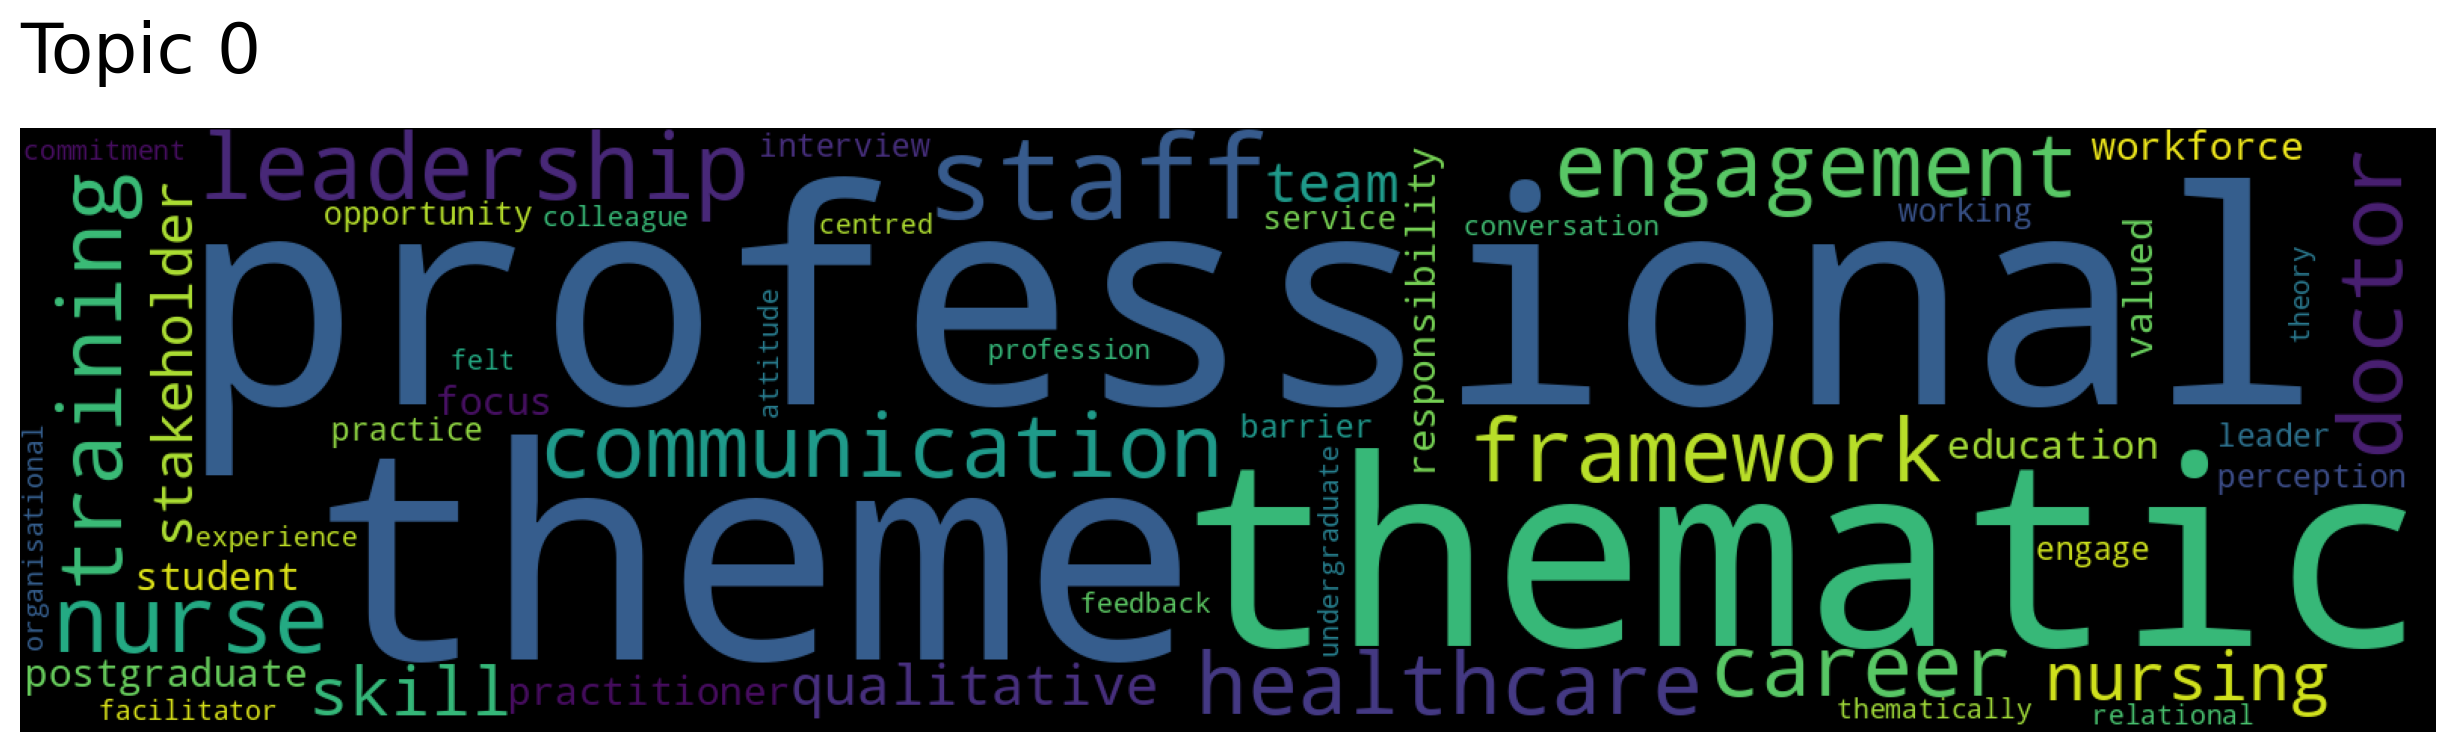

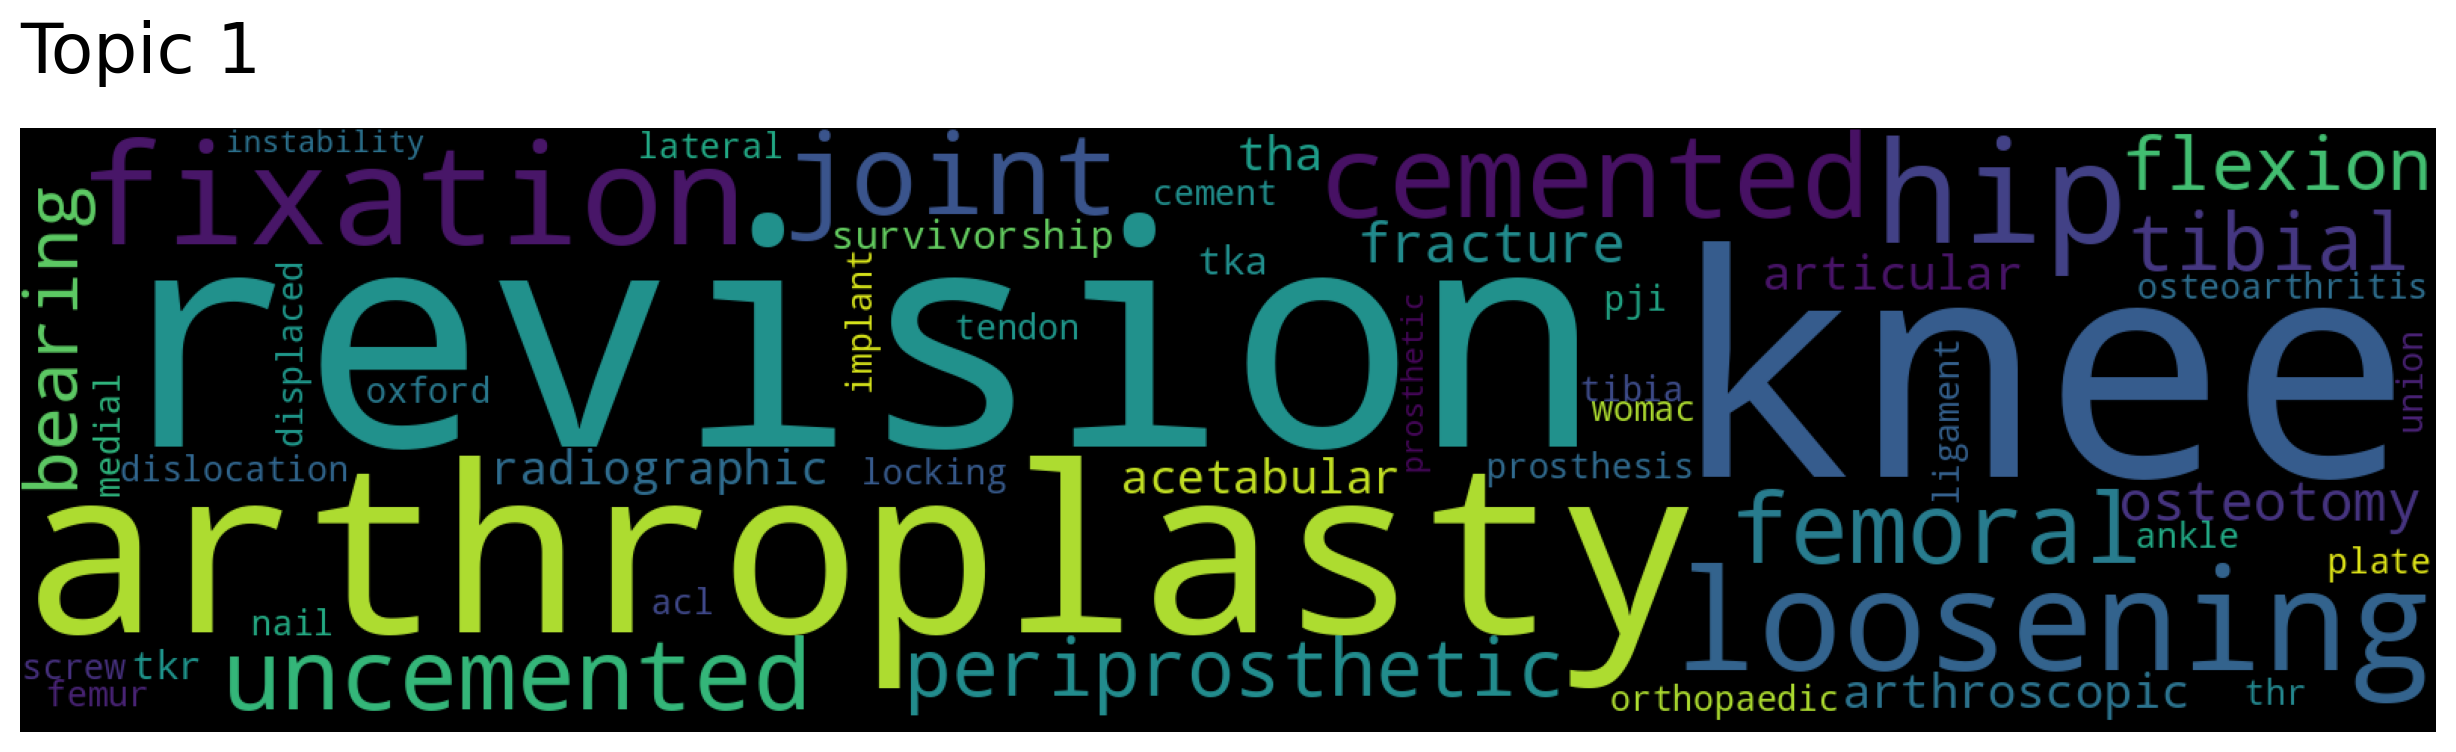

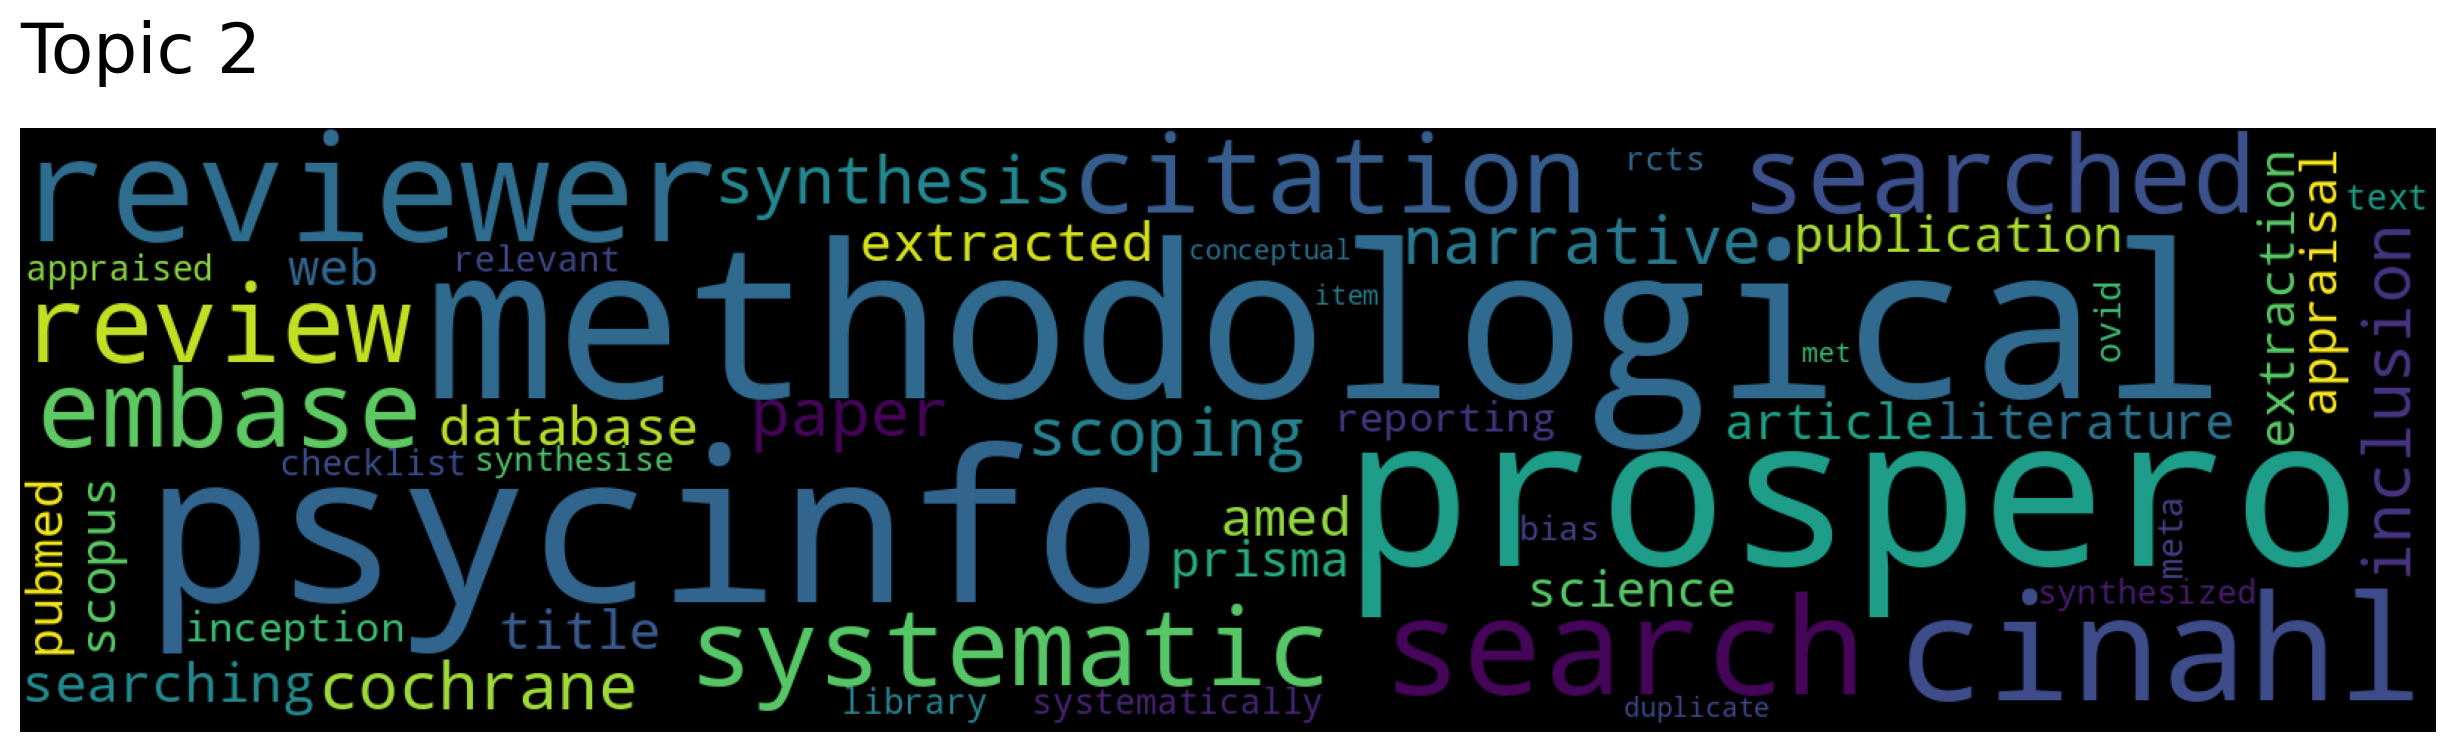

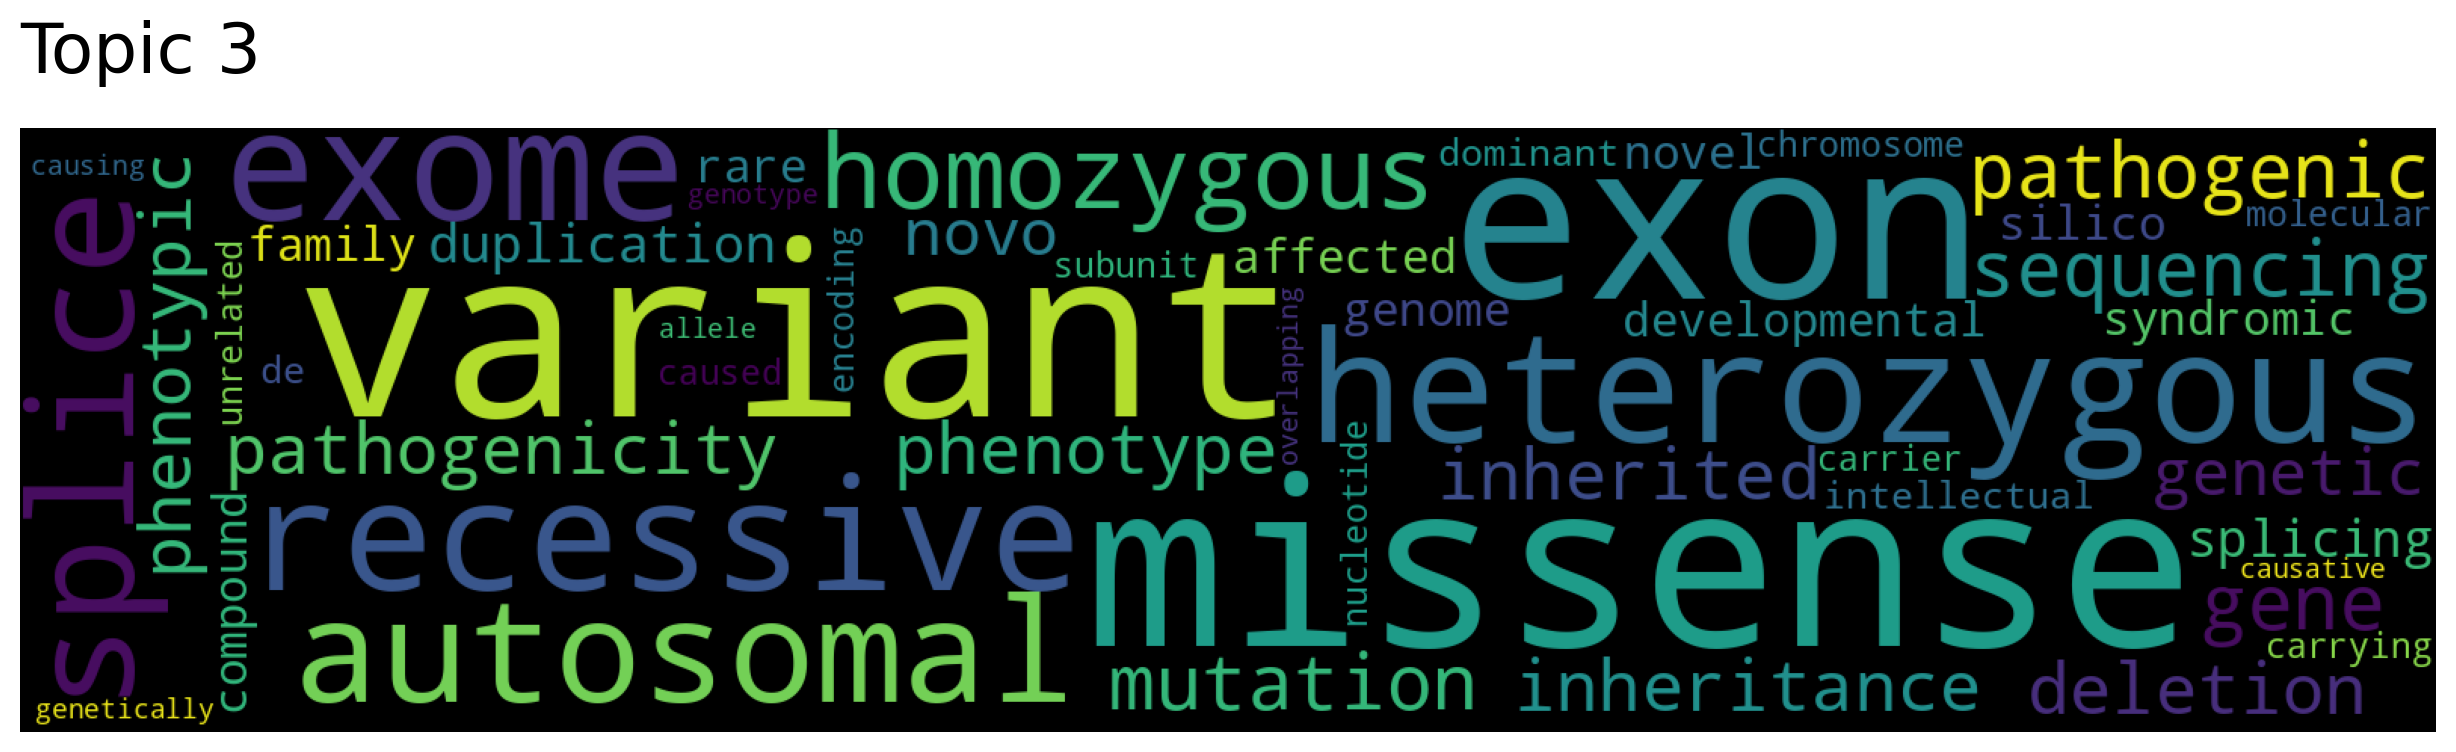

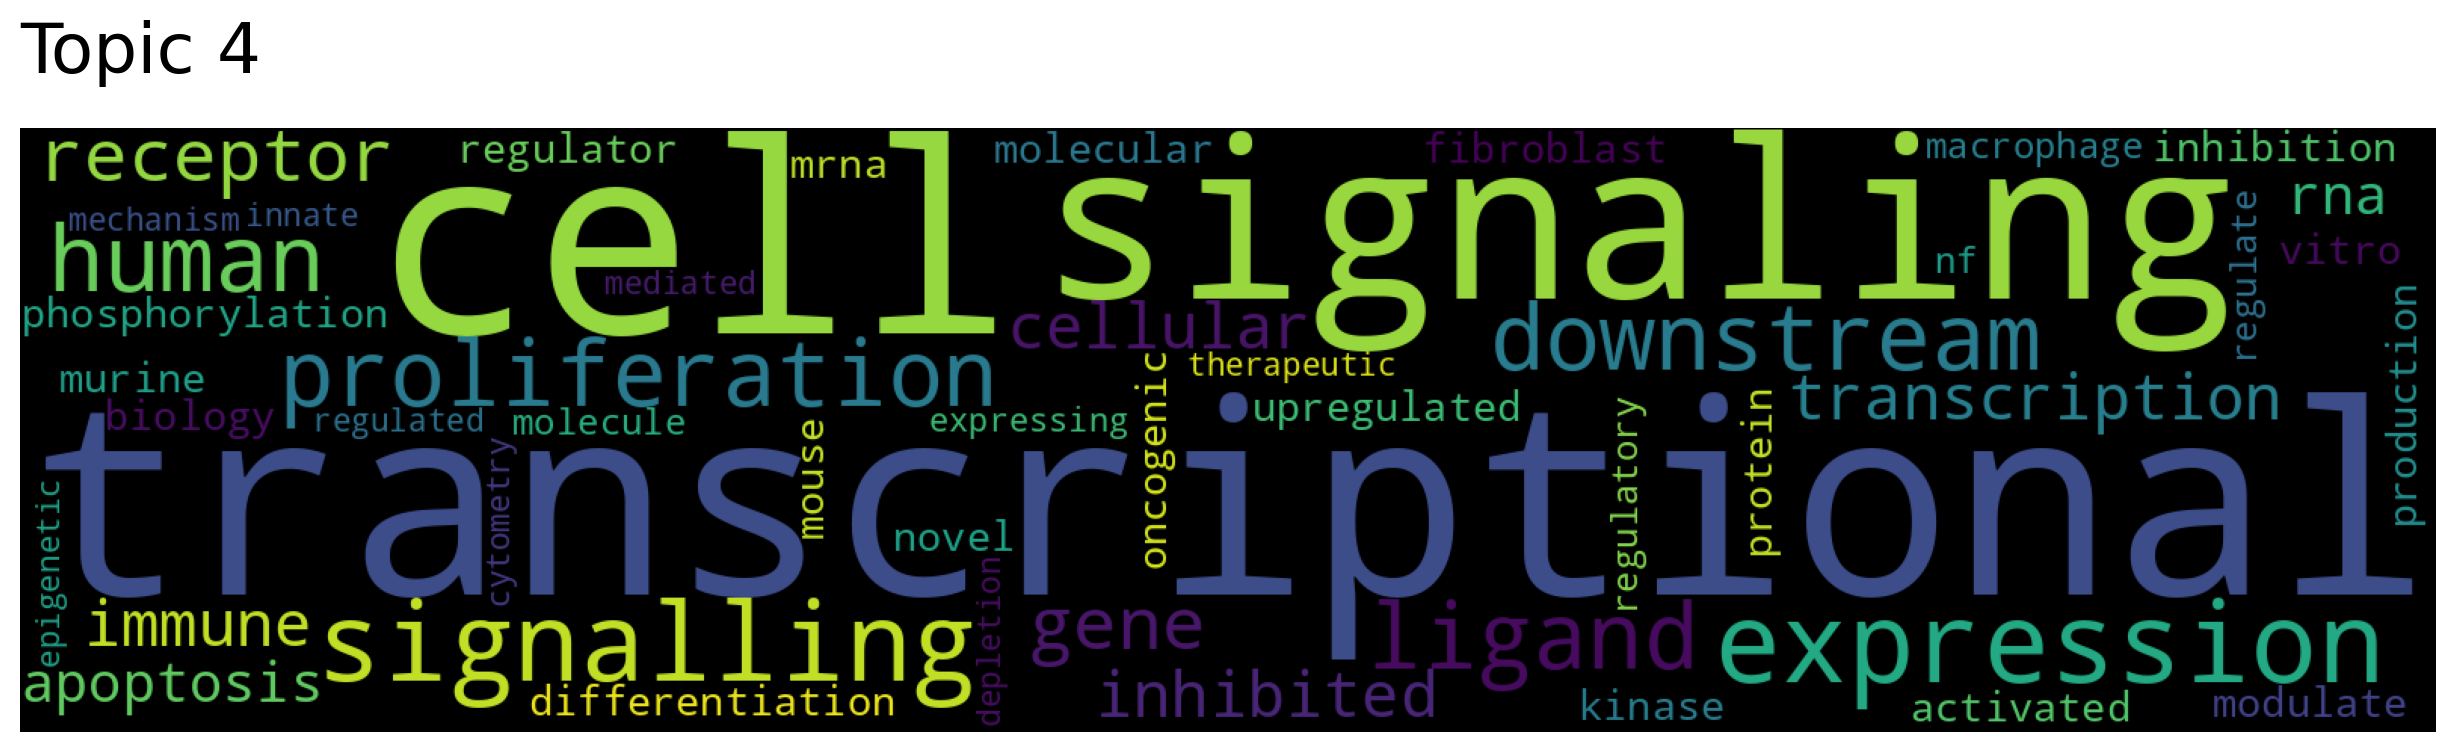

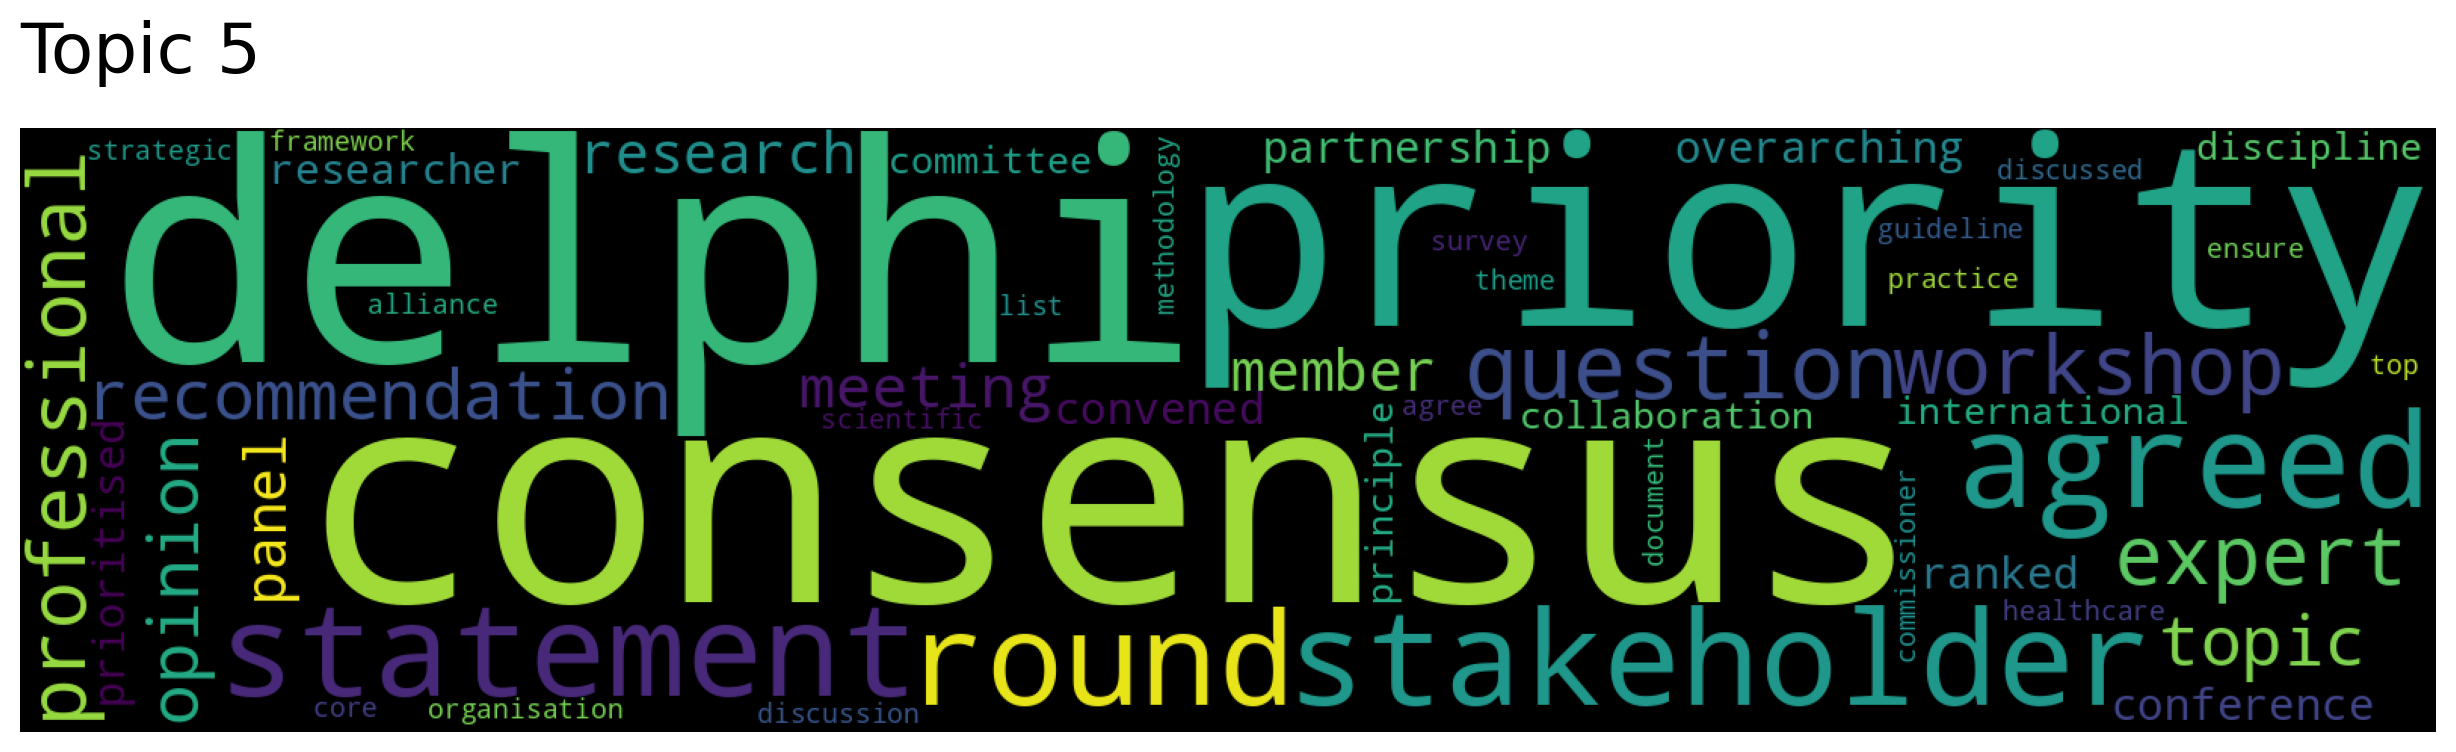

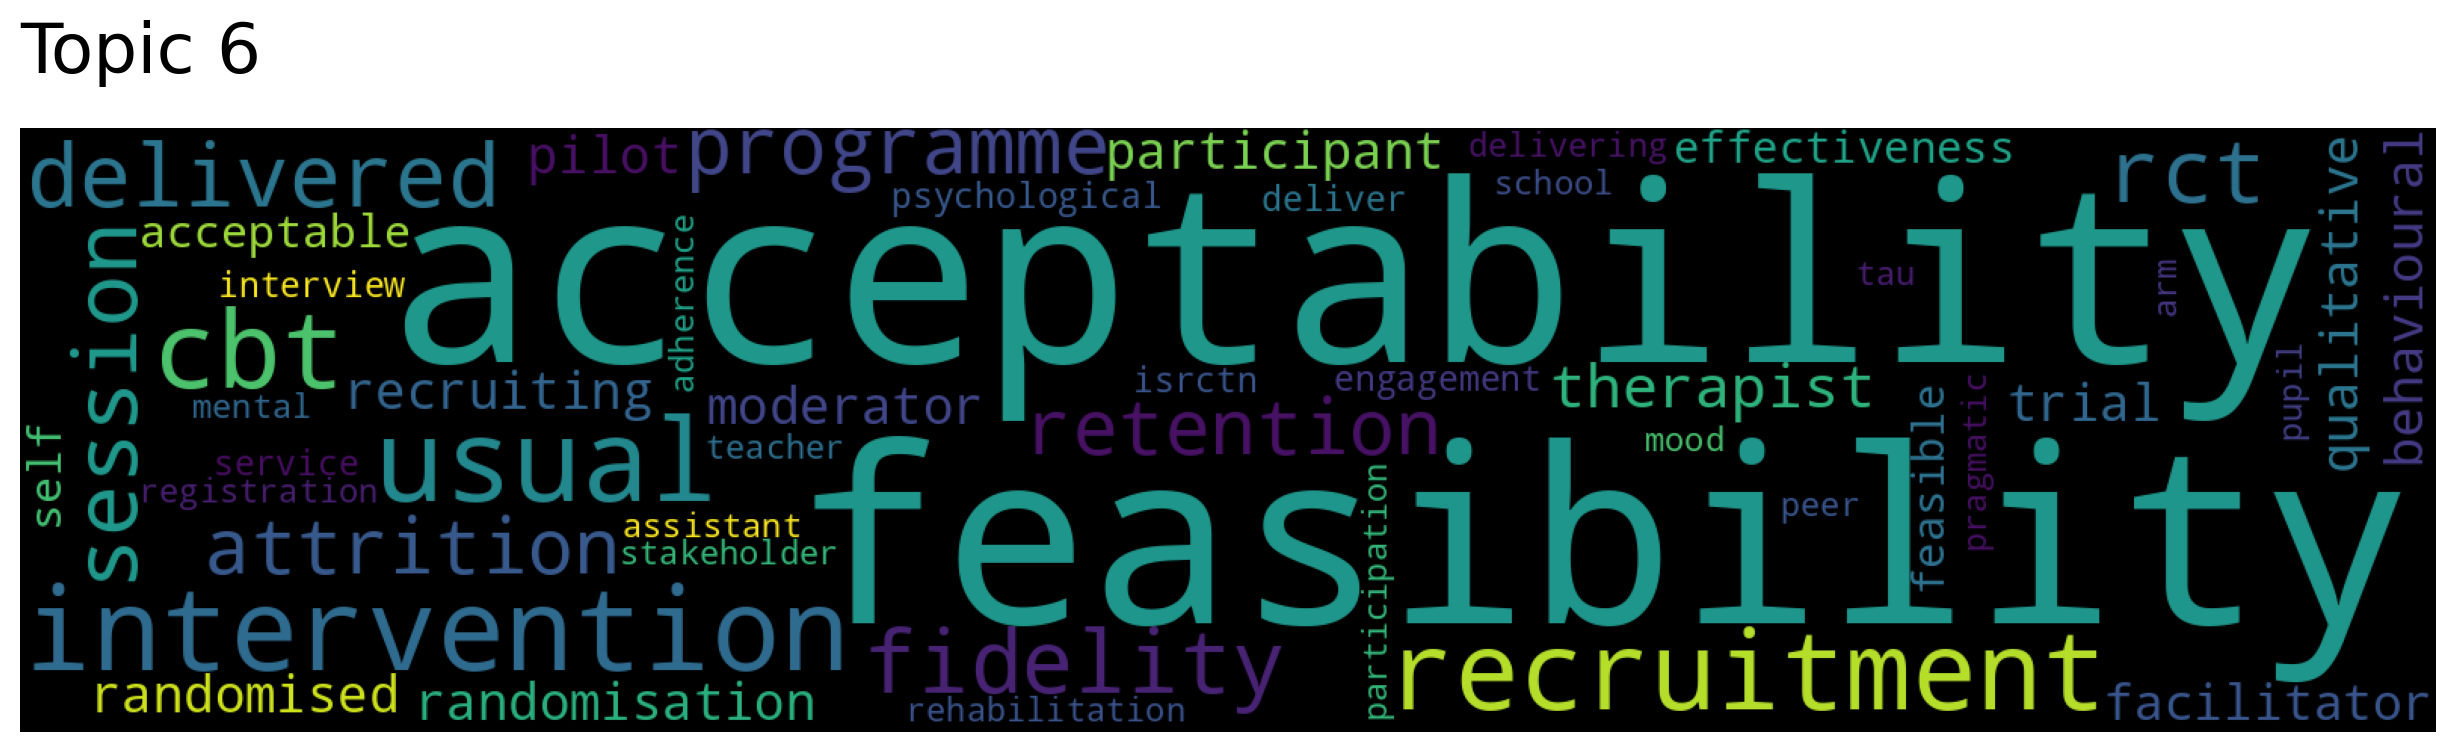

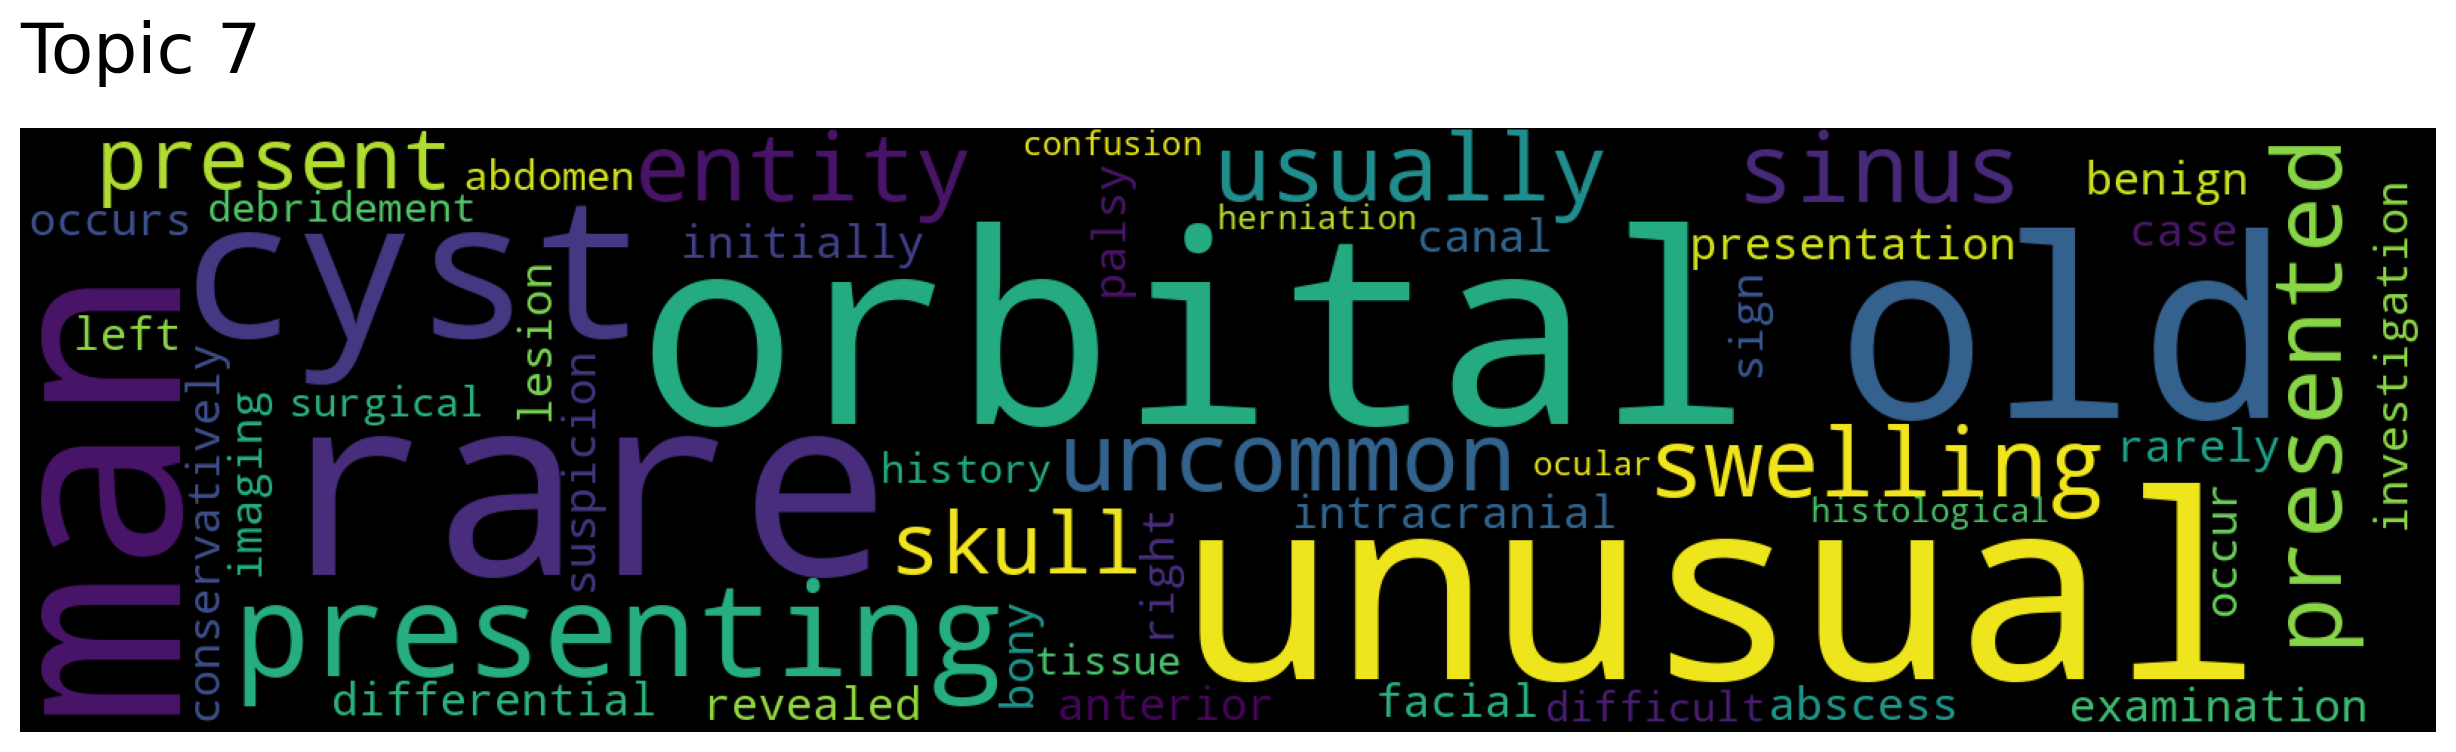

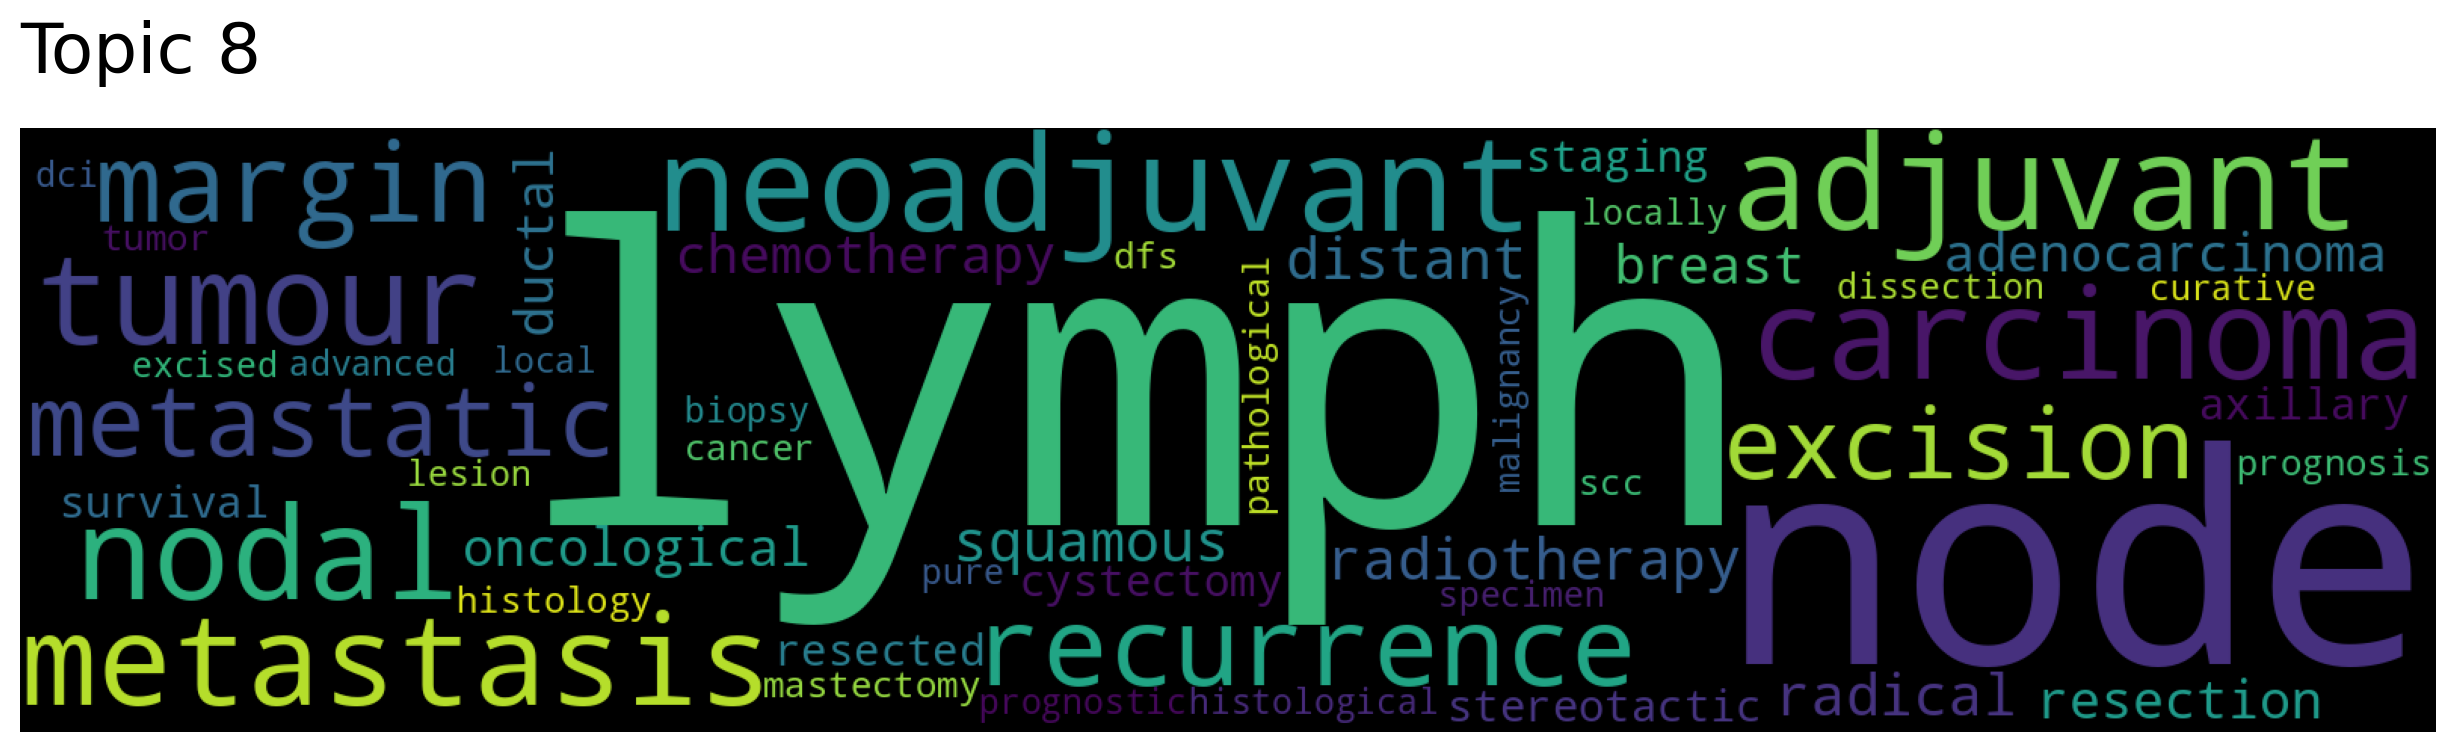

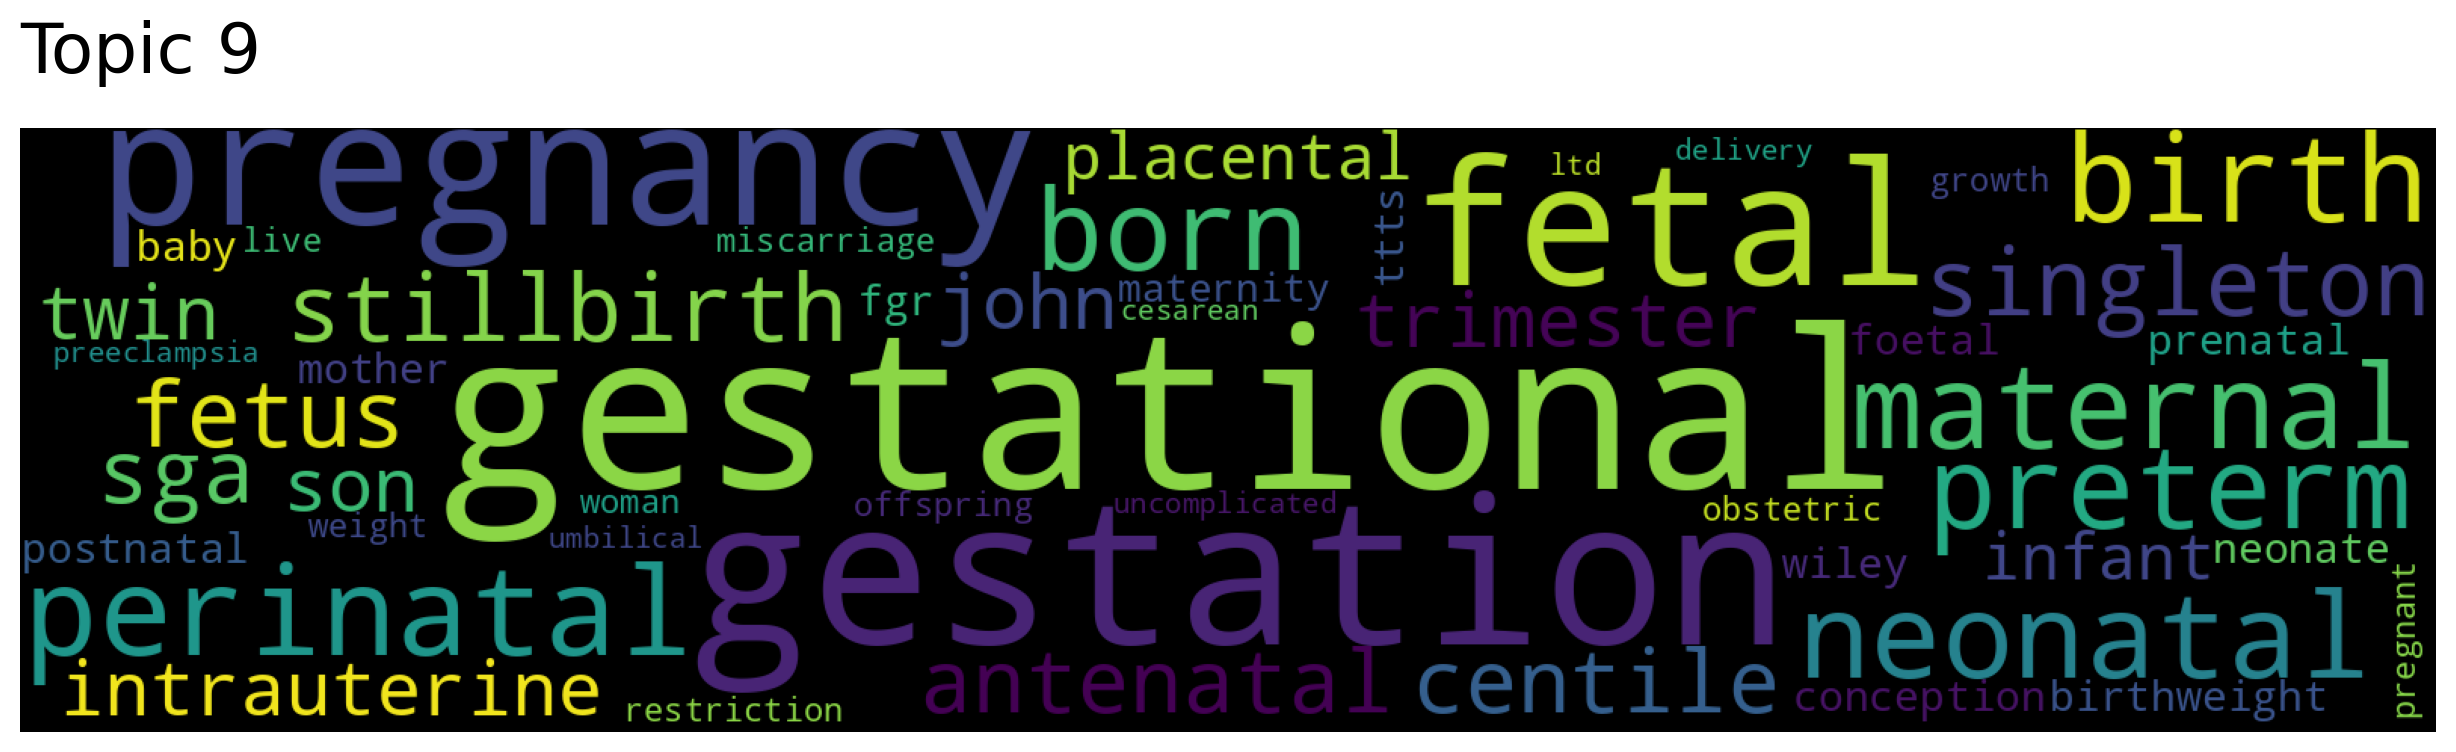

In [12]:
for i in range(10): 
    model.generate_topic_wordcloud(i)

In [15]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["cancer"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 5869, Score: 0.42400243878364563
-----------
['cancer', 'discov']
-----------

Document: 5376, Score: 0.3831831216812134
-----------
['j', 'natl', 'cancer', 'inst', 'j', 'natl', 'cancer', 'inst']
-----------

Document: 15389, Score: 0.37736329436302185
-----------
['cancer']
-----------

Document: 18896, Score: 0.3630790710449219
-----------
['case', 'series', 'cabazitaxel', 'challenge', 'chemotherapy', 'metastatic', 'castration', 'resistant', 'prostate', 'cancer', 'previously', 'received', 'docetaxel', 'cabazitaxel', 'chemotherapy']
-----------

Document: 2855, Score: 0.3608700931072235
-----------
['molecular', 'testing', 'genetic', 'genomic', 'variation', 'ha', 'become', 'integral', 'part', 'breast', 'cancer', 'management', 'family', 'history', 'breast', 'cancer', 'tumor', 'bilateral', 'breast', 'cancer', 'early', 'onset', 'breast', 'cancer', 'warrant', 'genetic', 'testing', 'determine', 'whether', 'hereditary', 'cancer', 'syndrome', 'present', 'availability', 'parp', 'inh

In [18]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["antibiotic"], num_topics=5)
topic_nums

array([116,  10, 221, 282, 243])

In [19]:
topic_words

[array(['stewardship', 'antimicrobial', 'antibiotic', 'prescribing', 'amr',
        'healthcare', 'nurse', 'pharmacist', 'antifungal', 'prescribers',
        'resistance', 'threat', 'inappropriate', 'undergraduate',
        'community', 'opportunity', 'resistant', 'microbiological',
        'prescription', 'competency', 'principle', 'cover', 'overarching',
        'organism', 'pharmaceutical', 'nursing', 'medicine',
        'microbiology', 'broad', 'education', 'century', 'pharmacy',
        'practice', 'strategic', 'isolates', 'postgraduate',
        'responsibility', 'implementing', 'situation', 'dilemma', 'mdr',
        'cpe', 'incorporate', 'optimizing', 'candida', 'professional',
        'pathogen', 'policy', 'organizational', 'infrastructure'],
       dtype='<U15'),
 array(['aureus', 'isolates', 'staphylococcus', 'mrsa', 'organism',
        'pathogen', 'resistant', 'outbreak', 'pseudomonas',
        'microbiological', 'streptococcus', 'spp', 'escherichia',
        'transmission',